In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

pd.options.display.max_rows = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

<IPython.core.display.Javascript object>


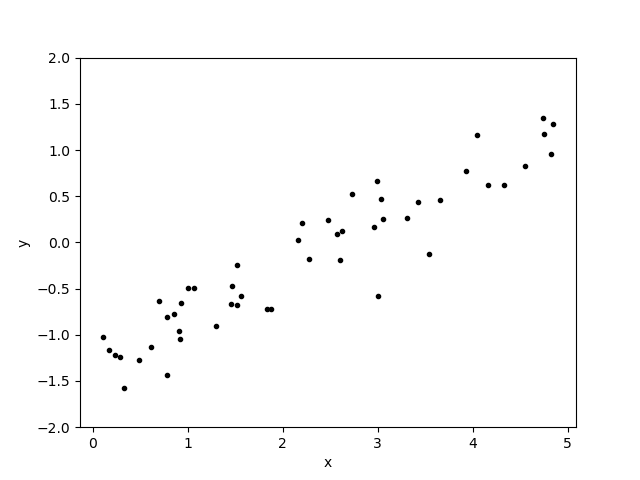

In [2]:
np.random.seed(42)

true_m = 0.5
true_b = -1.3
true_logs = np.log(0.3)

x = np.sort(np.random.uniform(0, 5, 50))
y = true_b + true_m * x + np.exp(true_logs) * np.random.randn(len(x))

plt.plot(x2, y, ".k")
plt.ylim(-2, 2)
plt.xlabel("x")
plt.ylabel("y");

In [3]:
with pm.Model() as model:

    # Define the priors on each parameter:
    m = pm.Uniform("m", lower=-5, upper=5)
    b = pm.Uniform("b", lower=-5, upper=5)
    logs = pm.Uniform("logs", lower=-5, upper=5)

    # Define the likelihood. A few comments:
    #  1. For mathematical operations like "exp", you can't use
    #     numpy. Instead, use the mathematical operations defined
    #     in "pm.math".
    #  2. To condition on data, you use the "observed" keyword
    #     argument to any distribution. In this case, we want to
    #     use the "Normal" distribution (look up the docs for
    #     this).
    pm.Normal("obs", mu=m*x+b, sd=pm.math.exp(logs), observed=y)

    # This is how you will sample the model. Take a look at the
    # docs to see that other parameters that are available.
    trace = pm.sample(draws=1000, tune=1000, chains=2)

NameError: name 'x' is not defined

In [4]:
with model:
    az.plot_trace(trace, compact = False)

NameError: name 'trace' is not defined

In [13]:
with model:
    display(az.summary(trace, round_to=2))

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
m     0.51  0.03    0.45     0.56        0.0      0.0    705.79    956.21   
b    -1.33  0.08   -1.46    -1.17        0.0      0.0    675.03    762.49   
logs -1.27  0.10   -1.47    -1.08        0.0      0.0   1126.58    971.11   

      r_hat  
m      1.01  
b      1.01  
logs   1.00

<IPython.core.display.Javascript object>


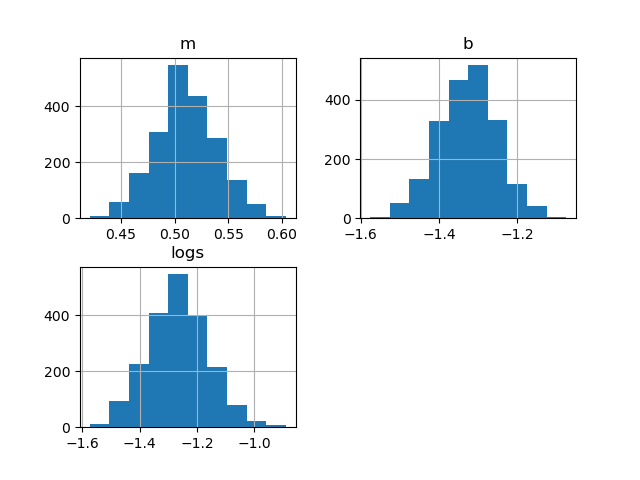

array([[<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'logs'}>, <AxesSubplot:>]],
      dtype=object)

In [21]:
df_samples = pm.trace_to_dataframe(trace, varnames=["m", "b", "logs"])
df_samples.hist()